# Simple example CBPS using Lalonde

In [1]:
import cbpys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

In [2]:
# Read lalonde data
df = pd.read_csv("data/lalonde_psid.csv")
w, y = df.treat.values, df.re78.values
X = df.drop(columns=["treat", "re78"]).values
X = MinMaxScaler().fit_transform(X)

In [3]:
print(
    f"Naive difference in means: {y[w == 1].mean() - y[w == 0].mean()}"
)

Naive difference in means: -15204.775555988717


In [4]:
df2 = pd.read_csv("data/lalonde_exp.csv")
treatment_effect = df2.groupby("treat")["re78"].mean().sort_index().pipe(lambda x: x[1] - x[0])

print(
    f"Experimental benchmark in means: {treatment_effect}"
)

Experimental benchmark in means: 1794.3430848752596


## Balancing means 

### baseline case

In [5]:
cbps = cbpys.CBPS(
    X=X,
    W=w,
    estimand="ATT",
    intercept=True,
    noi=False,
    niter=10000,
    lr=1e-2,
    reg=1e-5,
    svd=None,
)
weights = cbps.weights(numpy=True)

Optimizing CBPS...: 100%|██████████| 10000/10000 [00:06<00:00, 1609.86it/s]


In [6]:
y[w == 1].mean() - np.average(y[w == 0], weights=weights)

np.float64(2333.240976908003)

<Axes: xlabel='Standardized Differences', ylabel='Variables'>

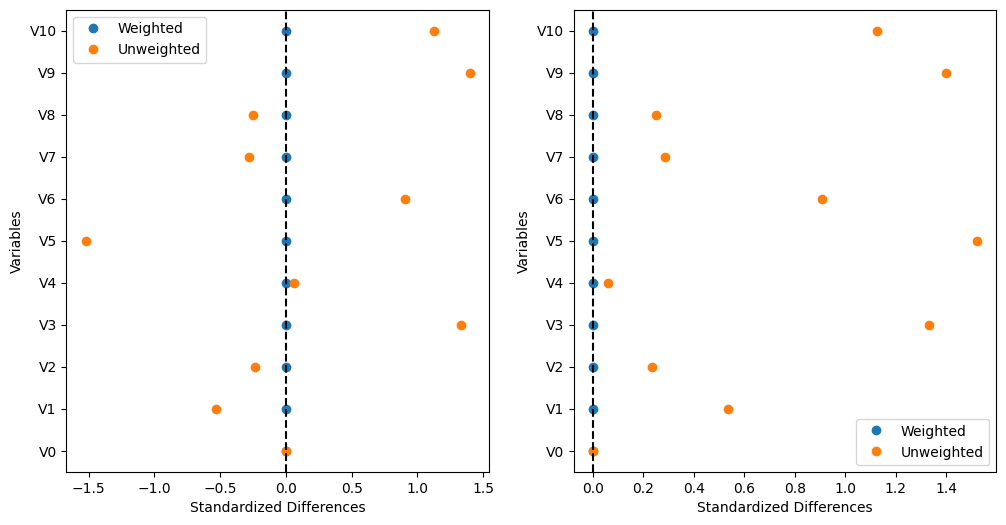

In [6]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))
cbps.diagnose(method="smd", ax = ax[0])
cbps.diagnose(method="asmd", ax = ax[1])

### High Dimensional Balancing - interactions

In [16]:
from sklearn.preprocessing import PolynomialFeatures

w, y = df.treat.values, df.re78.values

X = df.drop(columns=["treat", "re78"]).values
X = MinMaxScaler().fit_transform(X)
X = PolynomialFeatures(degree=2).fit_transform(X)
cbps = cbpys.CBPS(
    X=X,
    W=w,
    estimand="ATT",
    intercept=True,
    noi=False,
    niter=10_000,
    lr=1e-3,
    reg=1e-4,
    svd=None,
)
weights = cbps.weights(numpy=True)

Optimizing CBPS...:   0%|          | 0/10000 [00:00<?, ?it/s]

Optimizing CBPS...: 100%|██████████| 10000/10000 [00:06<00:00, 1573.24it/s]


In [17]:
y[w == 1].mean() - np.average(y[w == 0], weights=weights)

np.float64(1692.3682595858327)

<Axes: xlabel='Unweighted Standardized Differences', ylabel='Weighted Standardized Differences'>

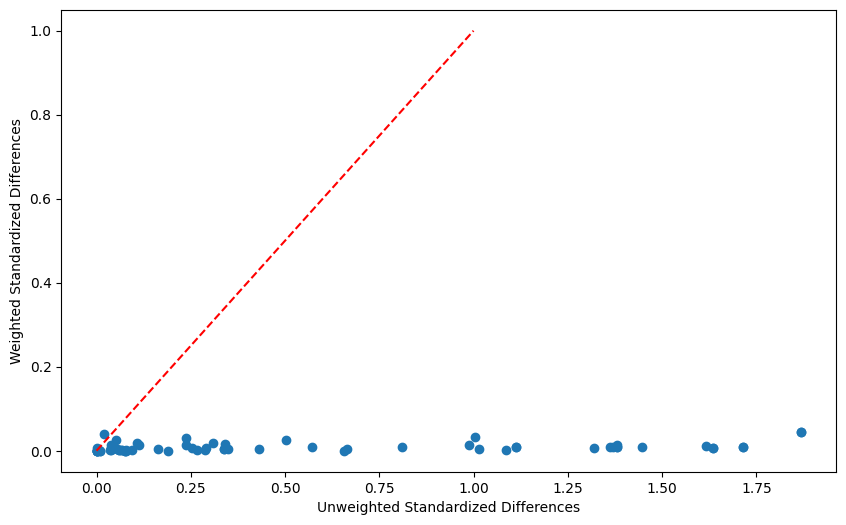

In [18]:
cbps.diagnose(method="asmd", scatter=True)